In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from random import randint

In [3]:
def constFunc(values):
    ans = 0
    idealWeights = [0.3,0.1,-0.8,0.3,1.2]
    for i in range(len(values)):
        ans += values[i]*idealWeights[i]
    return ans + 0.1

In [45]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(10):
    values = []
    for attribute in range(5):
        values.append(randint(0,100)/100.0)
    x.append(values)
    y.append(constFunc(values))
print(x,len(x))
print(y,len(y))

[[0.75, 0.02, 0.37, 0.12, 0.32], [0.55, 0.4, 0.05, 0.06, 0.62], [0.94, 0.38, 0.8, 0.64, 0.62], [0.3, 0.51, 0.46, 0.17, 0.99], [0.61, 0.15, 0.51, 0.07, 0.51], [0.97, 0.1, 0.45, 0.61, 0.63], [0.16, 0.66, 0.17, 0.0, 0.56], [0.52, 0.39, 0.04, 0.63, 0.76], [0.31, 0.52, 0.39, 0.76, 0.91], [0.25, 0.48, 0.3, 0.37, 0.36]] 10
[0.351, 0.927, 0.6159999999999999, 1.012, 0.42299999999999993, 0.8799999999999999, 0.65, 1.2639999999999998, 1.153, 0.426] 10


In [19]:
model = Sequential()
model.add(Dense(1, input_shape = (5,)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.76999474],
        [-0.0709033 ],
        [ 0.22346091],
        [-0.1820333 ],
        [-0.9550402 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [53]:
inp = np.array(x[0], dtype = np.float32)
print(inp.shape)
model.predict(x)

(5,)


array([[0.50195426],
       [0.7218475 ],
       [1.1793672 ],
       [0.6737041 ],
       [0.4611612 ],
       [1.0694453 ],
       [0.58644414],
       [1.1352798 ],
       [1.1263335 ],
       [0.72769725]], dtype=float32)

In [3]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x,y)

NameError: name 'model' is not defined

In [56]:
model.predict(x)

array([[0.49937454],
       [0.7191681 ],
       [1.174988  ],
       [0.67027503],
       [0.45831165],
       [1.0656859 ],
       [0.5838949 ],
       [1.1319405 ],
       [1.1224444 ],
       [0.7249378 ]], dtype=float32)

In [57]:
model.weights

[<tf.Variable 'dense_22/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.60095733],
        [ 0.6961933 ],
        [-0.25221017],
        [ 0.73194474],
        [ 0.12880333]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00099997], dtype=float32)>]

In [68]:
weightMatrix = []
weightMatrix.append(np.array(model.get_weights()))

In [81]:
print(weightMatrix[0])
for i in weightMatrix[0]:
    print(i)
    ar = np.array(i)
    for j in ar:
        print(j)
        print()
#     print()


[array([[ 0.60095733],
       [ 0.6961933 ],
       [-0.25221017],
       [ 0.73194474],
       [ 0.12880333]], dtype=float32)
 array([-0.00099997], dtype=float32)]
[[ 0.60095733]
 [ 0.6961933 ]
 [-0.25221017]
 [ 0.73194474]
 [ 0.12880333]]
[0.60095733]

[0.6961933]

[-0.25221017]

[0.73194474]

[0.12880333]

[-0.00099997]
-0.0009999672



In [4]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(100000):
    values = []
    for attribute in range(5):
        values.append(randint(1000,90000)/100000)
    x.append(values)
    y.append(constFunc(values))
print(len(x),x[:5])
print(len(y),y[:5])

100000 [[0.43969, 0.04133, 0.6904, 0.82994, 0.7839], [0.50024, 0.12126, 0.14772, 0.38317, 0.65519], [0.57978, 0.64053, 0.29909, 0.13962, 0.26294], [0.13474, 0.01794, 0.74819, 0.3353, 0.25868], [0.03474, 0.8905, 0.59159, 0.75495, 0.85354]]
100000 [0.8733819999999999, 1.045201, 0.4561289999999999, -0.04533000000000001, 0.9769329999999998]


In [45]:
model.compile(optimizer = 'adam', loss = 'mse')
trackingArray = []
for i in range(0,100000,10):
    model.fit(x[i:i+20],y[i:i+20])
    trackingArray.append(np.array(model.get_weights()))
# trackingArray = np.asarray(trackingArray)
# print(trackingArray.shape)
print(len(trackingArray))

1/1 [==============================] - 0s 1ms/step - loss: 0.1313


1/1 [==============================] - 0s 843us/step - loss: 0.0948


1/1 [==============================] - 0s 1ms/step - loss: 0.0690


1/1 [==============================] - 0s 896us/step - loss: 0.0345


1/1 [==============================] - 0s 1ms/step - loss: 0.0309


1/1 [==============================] - 0s 902us/step - loss: 0.0154


1/1 [==============================] - 0s 812us/step - loss: 0.0164


1/1 [==============================] - 0s 856us/step - loss: 0.0059


1/1 [==============================] - 0s 963us/step - loss: 0.0033


1/1 [==============================] - 0s 841us/step - loss: 0.0018


1/1 [==============================] - 0s 752us/step - loss: 6.9118e-04


1/1 [==============================] - 0s 931us/step - loss: 4.8127e-04


1/1 [==============================] - 0s 1ms/step - loss: 1.6383e-04


1/1 [==============================] - 0s 860us/step - loss: 1.6982e-04


1/1 [==============================] - 0s 821us/step - loss: 6.5920e-05


1/1 [==============================] - 0s 1ms/step - loss: 3.9429e-05


1/1 [==============================] - 0s 829us/step - loss: 3.1658e-05


1/1 [==============================] - 0s 862us/step - loss: 6.2209e-06


1/1 [==============================] - 0s 803us/step - loss: 7.8671e-06


1/1 [==============================] - 0s 1ms/step - loss: 8.4910e-07


1/1 [==============================] - 0s 812us/step - loss: 7.7914e-07


1/1 [==============================] - 0s 805us/step - loss: 1.1017e-07


1/1 [==============================] - 0s 909us/step - loss: 4.3842e-08


1/1 [==============================] - 0s 848us/step - loss: 1.4002e-08


1/1 [==============================] - 0s 858us/step - loss: 2.3986e-09


1/1 [==============================] - 0s 946us/step - loss: 6.2881e-11


1/1 [==============================] - ETA: 0s - loss: 6.6016e-1 - 0s 3ms/step - loss: 6.6016e-12


1/1 [==============================] - 0s 1ms/step - loss: 1.9609e-12


1/1 [==============================] - 0s 894us/step - loss: 9.9577e-13


1/1 [==============================] - 0s 1ms/step - loss: 7.1470e-13


1/1 [==============================] - 0s 932us/step - loss: 6.8364e-13


1/1 [==============================] - 0s 1ms/step - loss: 5.8038e-13


1/1 [==============================] - 0s 977us/step - loss: 2.8994e-13


1/1 [==============================] - 0s 1ms/step - loss: 4.2345e-13


1/1 [==============================] - 0s 1ms/step - loss: 3.4709e-13


1/1 [==============================] - 0s 768us/step - loss: 2.0045e-13


1/1 [==============================] - 0s 911us/step - loss: 2.4458e-13


1/1 [==============================] - 0s 878us/step - loss: 1.6660e-13


1/1 [==============================] - 0s 765us/step - loss: 2.4362e-13


1/1 [==============================] - 0s 774us/step - loss: 8.2626e-14


1/1 [==============================] - 0s 963us/step - loss: 1.0754e-13


1/1 [==============================] - 0s 834us/step - loss: 5.2680e-14


1/1 [==============================] - 0s 1ms/step - loss: 1.0923e-13


1/1 [==============================] - 0s 854us/step - loss: 8.8984e-14


1/1 [==============================] - 0s 1ms/step - loss: 3.8483e-14


1/1 [==============================] - 0s 1ms/step - loss: 3.2918e-14


1/1 [==============================] - 0s 924us/step - loss: 3.4084e-14


1/1 [==============================] - 0s 906us/step - loss: 2.3603e-14


1/1 [==============================] - 0s 903us/step - loss: 1.3492e-14


1/1 [==============================] - 0s 1ms/step - loss: 1.3967e-14
10000


In [46]:
print(model.predict(x[:10]))
print("\n\n\n\n\n",y[:10])

[[ 0.8582059 ]
 [ 1.5126408 ]
 [ 1.1129727 ]
 [ 0.36366192]
 [ 0.97863185]
 [ 0.0959371 ]
 [ 0.908058  ]
 [ 0.5678512 ]
 [ 1.2051128 ]
 [-0.13007188]]





 [0.8582059999999999, 1.512641, 1.112973, 0.36366200000000004, 0.978632, 0.09593700000000002, 0.9080579999999999, 0.567851, 1.205113, -0.13007200000000002]


In [47]:
print(trackingArray[-1])
print("ideal:", [0.3,0.1,-0.8,0.3,1.2])

[array([[ 0.29999986],
       [ 0.09999999],
       [-0.8000001 ],
       [ 0.3000001 ],
       [ 1.1999995 ]], dtype=float32)
 array([0.10000025], dtype=float32)]
ideal: [0.3, 0.1, -0.8, 0.3, 1.2]


In [48]:
npTA = np.array(trackingArray)

In [49]:
# attribute1 = npTA[:,0,0]
# print(attribute1.shape)
# print(attribute1[:10])
a1 = []
for i in range(int(npTA.shape[0])):
    a1.append(float(npTA[i][0][0]))
print(len(a1))
print(a1[:10])

10000
[-0.18118628859519958, -0.18020819127559662, -0.17933480441570282, -0.1786377727985382, -0.17810137569904327, -0.1774943470954895, -0.17687122523784637, -0.17638114094734192, -0.17610476911067963, -0.17590656876564026]


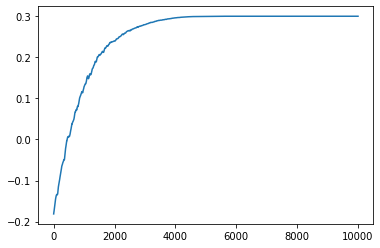

In [50]:
import matplotlib.pyplot as plt
plt.plot(a1)

In [51]:
a2 = []
for i in range(int(npTA.shape[0])):
    a2.append(float(npTA[i][0][1]))
print(len(a2))
print(a2[:10])

10000
[0.2905656099319458, 0.2913394570350647, 0.2916957437992096, 0.291491836309433, 0.29099369049072266, 0.29063791036605835, 0.29032522439956665, 0.28978174924850464, 0.28910592198371887, 0.28846773505210876]


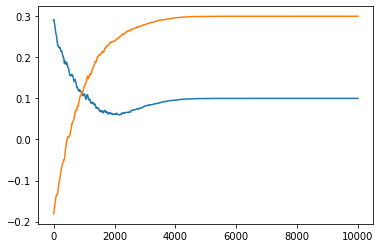

In [58]:
plt.plot(a2)
plt.plot(a1)
# plt.plot(npTA[:][0][:])

10000
[0.19322508573532104, 0.19222408533096313, 0.19122423231601715, 0.19022244215011597, 0.1892453283071518, 0.1883864849805832, 0.18753080070018768, 0.18664932250976562, 0.18573027849197388, 0.18480299413204193]


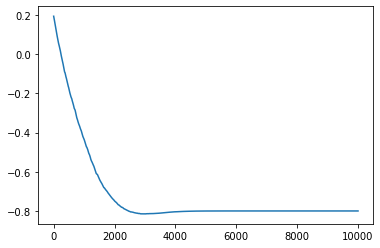

In [53]:
a3 = []
for i in range(int(npTA.shape[0])):
    a3.append(float(npTA[i][0][2]))
print(len(a3))
print(a3[:10])
plt.plot(a3)

10000
[0.4503272473812103, 0.45118892192840576, 0.4516298174858093, 0.4516306221485138, 0.45148786902427673, 0.45160871744155884, 0.4517868161201477, 0.4518282413482666, 0.4516701102256775, 0.4515187740325928]


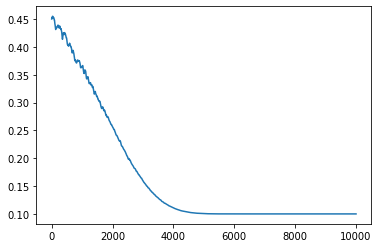

In [54]:
bias = []
for i in range(int(npTA.shape[0])):
    bias.append(float(npTA[i][1][0]))
print(len(bias))
print(bias[:10])
plt.plot(bias)

In [55]:
print(model.get_weights())
print("ideal weights:{}, bias = 0.1".format([0.3,0.1,-0.8,0.3,1.2]))

[array([[ 0.29999986],
       [ 0.09999999],
       [-0.8000001 ],
       [ 0.3000001 ],
       [ 1.1999995 ]], dtype=float32), array([0.10000025], dtype=float32)]
ideal weights:[0.3, 0.1, -0.8, 0.3, 1.2], bias = 0.1


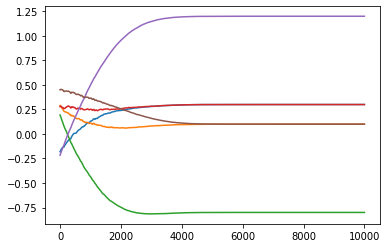

In [59]:
plots = [[],[],[],[],[],[]]
for i in range(int(npTA.shape[0])):
    for ind in range(5):
        plots[ind].append(float(npTA[i][0][ind]))
    plots[5].append(float(npTA[i][1][0]))
for i in plots:
    plt.plot(i)